weight: [ 0.06743251  2.2027766  -0.42012175 -2.11862664]


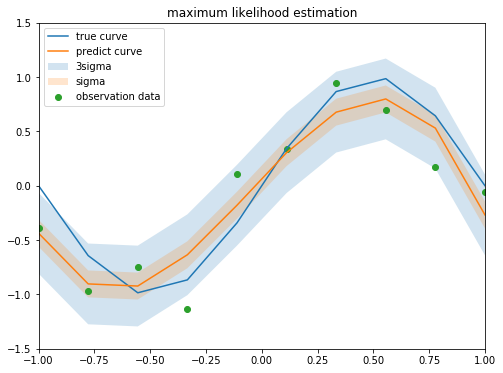

In [208]:
# 最尤推定
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def Phi(X):
    # X      : [[x0],[x1],...]
    # phi    : e.g. [1, x, x**2]
    # return : [[phi_1(X),...,phi_n(X)]]
    result = np.array([[1, x[0], x[0]**2, x[0]**3] for x in X])
    return result

N = 10
np.random.seed(1111)
x = np.linspace(-1,1,N)
t = np.sin(np.pi*x)
y = np.sin(np.pi*x) + np.random.normal(0,0.3,N)

# 縦ベクトルに変換
x = np.array([[i] for i in x])

w_ML = np.dot(np.dot(np.linalg.inv(np.dot(Phi(x).T, Phi(x))), Phi(x).T), y)
w_ML = np.array([[w] for w in w_ML])
print('weight: {}'.format(w_ML.ravel()))

variance_ML = (np.sum(np.square(y-np.dot(Phi(x), w_ML))) / N) ** (-1)

predict = np.dot(w_ML.T, Phi(x).T).ravel()

plt.figure(figsize=(8,6))
plt.plot(x.ravel(),t,label='true curve')
plt.fill_between(x.ravel(), predict+variance_ML*3, predict-variance_ML*3, alpha=0.2, label='3sigma')
plt.fill_between(x.ravel(), predict+variance_ML, predict-variance_ML, alpha=0.2, label='sigma')
plt.plot(x.ravel(), predict.ravel(),label='predict curve')
plt.scatter(x.ravel(),y, label='observation data')
plt.title('maximum likelihood estimation')
plt.xlim(-1,1)
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()

weight: [-1.03534920e-04  2.72793163e-04 -9.62391376e-05  1.18533161e-04
 -7.48626630e-05  7.35074008e-05 -6.28232705e-05  5.47322767e-05
 -5.57366108e-05  4.53136747e-05]


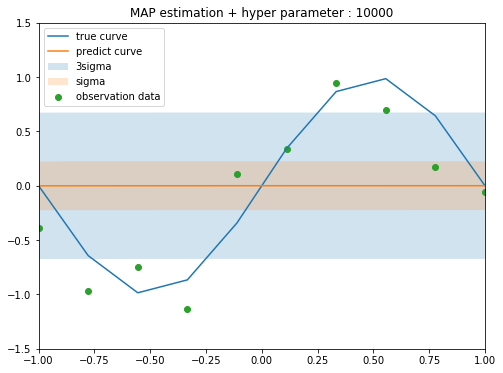

In [217]:
# MAP推定
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def Phi(X):
    # X      : [[x0],[x1],...]
    # phi    : e.g. [1, x, x**2]
    # return : [[phi_1(X),...,phi_n(X)]]
    result = np.array([[1, x[0], x[0]**2, x[0]**3, x[0]**4, x[0]**5, x[0]**6, x[0]**7, x[0]**8, x[0]**9] for x in X])
    return result

N = 10
np.random.seed(1111)
x = np.linspace(-1,1,N)
t = np.sin(np.pi*x)
y = np.sin(np.pi*x) + np.random.normal(0,0.3,N)
alpha = 10000 # ハイパーパラメータ

# 縦ベクトルに変換
x = np.array([[i] for i in x])

# MAP推定はここが変化するだけ
w_MAP = np.dot(np.dot(np.linalg.inv(np.dot(Phi(x).T, Phi(x))+alpha*np.eye(10)), Phi(x).T), y)
print('weight: {}'.format(w_MAP))
w_MAP = np.array([[w] for w in w_MAP])

beta_MAP = (np.sum(np.square(y-np.dot(Phi(x), w_MAP))) / N)
variance_MAP = beta_MAP ** (-1)

predict = np.dot(w_MAP.T, Phi(x).T).ravel()

plt.figure(figsize=(8,6))
plt.plot(x.ravel(),t,label='true curve')
plt.fill_between(x.ravel(), predict+variance_MAP*3, predict-variance_MAP*3, alpha=0.2, label='3sigma')
plt.fill_between(x.ravel(), predict+variance_MAP, predict-variance_MAP, alpha=0.2, label='sigma')
plt.plot(x.ravel(), predict.ravel(),label='predict curve')
plt.scatter(x.ravel(),y, label='observation data')
plt.title('MAP estimation + hyper parameter : {}'.format(alpha))
plt.xlim(-1,1)
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()